In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("C:/Users/Nick/Downloads/Mall_Customers.csv")

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#Univariate Analysis

In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


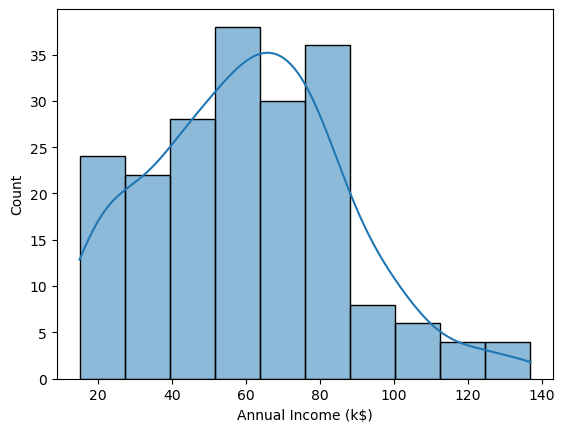

In [6]:
sns.histplot(data['Annual Income (k$)'], kde=True)
plt.show()

In [7]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

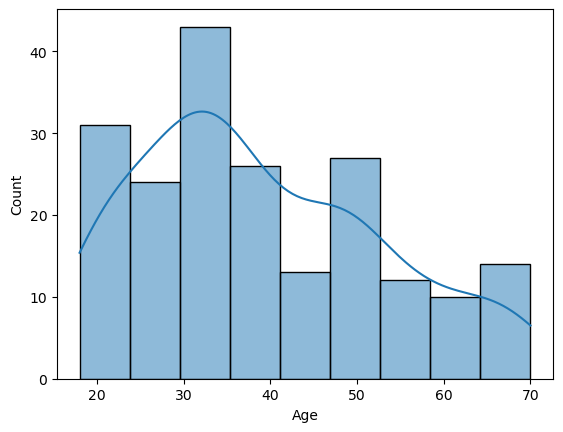

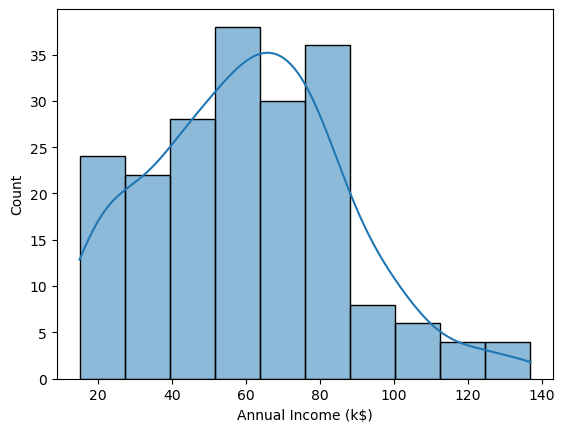

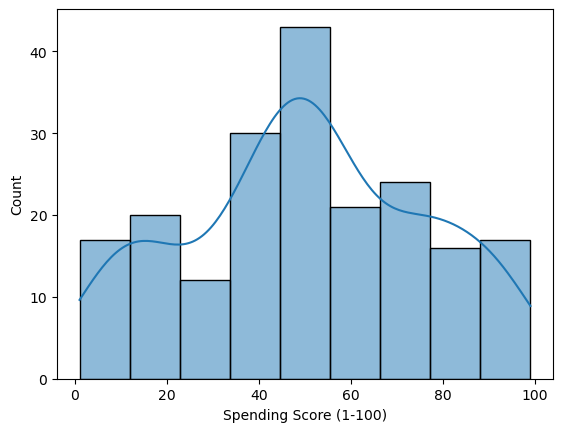

In [8]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.histplot(data[i], kde = True)

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

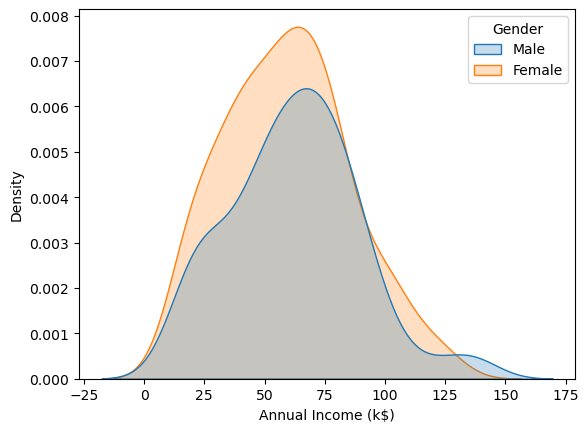

In [9]:
sns.kdeplot(data = data, x = 'Annual Income (k$)', shade = True, hue = 'Gender')

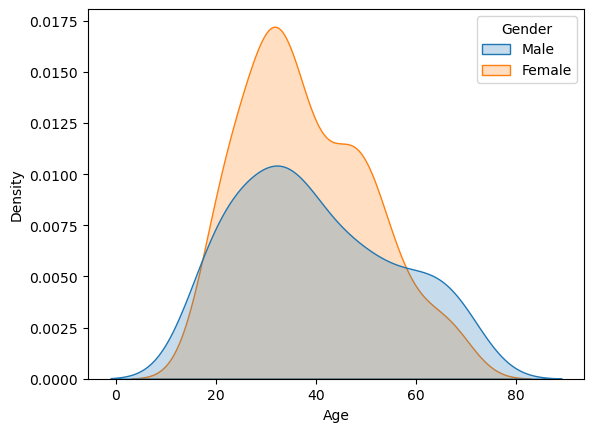

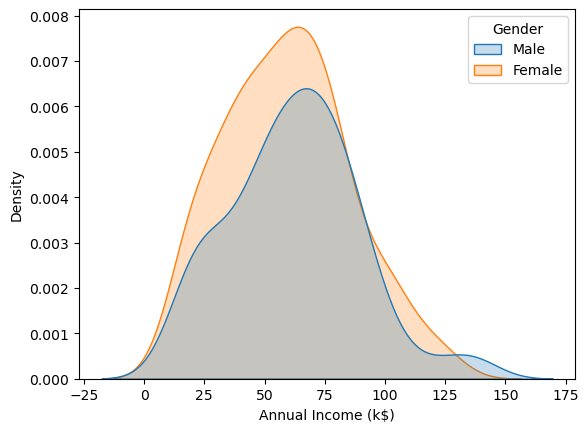

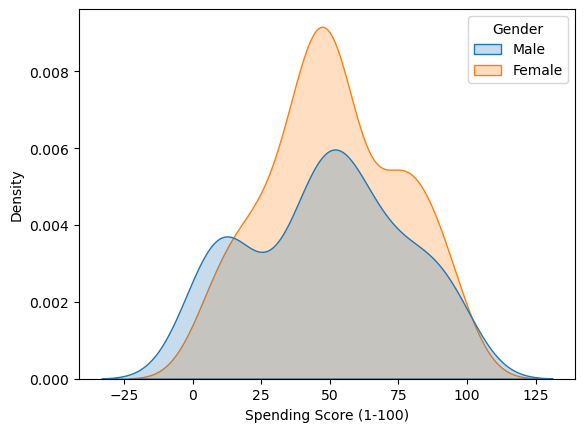

In [10]:
for i in columns:
    plt.figure()
    sns.kdeplot(data = data, x = i, shade = True, hue = 'Gender')

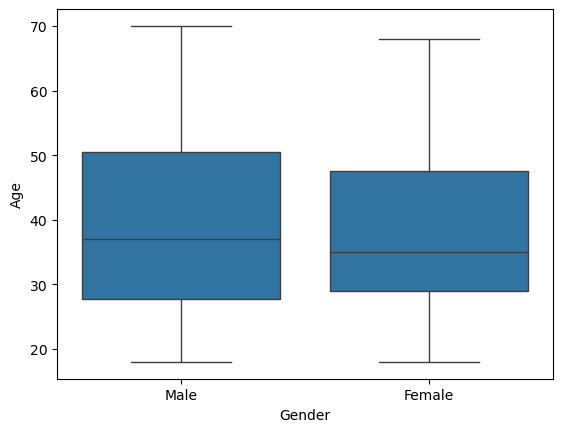

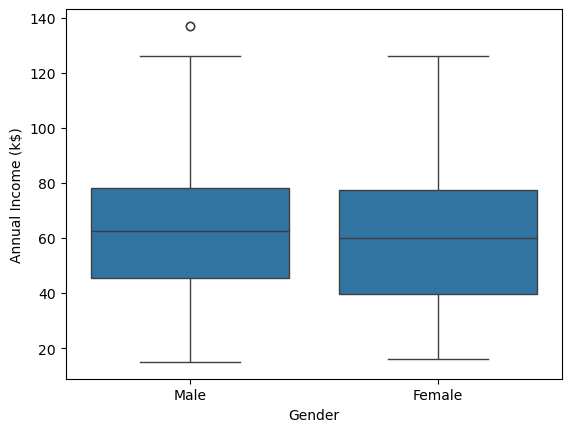

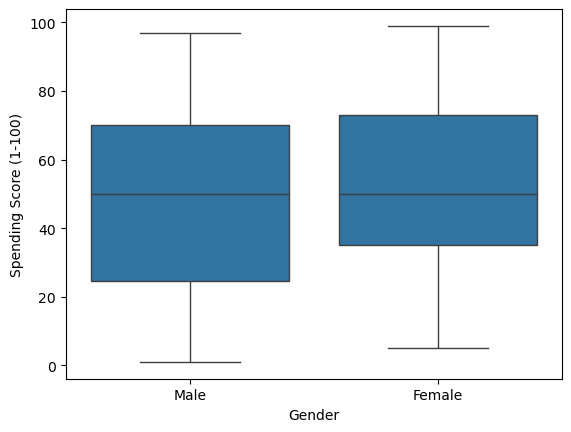

In [11]:
for i in columns:
    plt.figure()
    sns.boxplot(data=data, x='Gender', y = data[i])

#Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

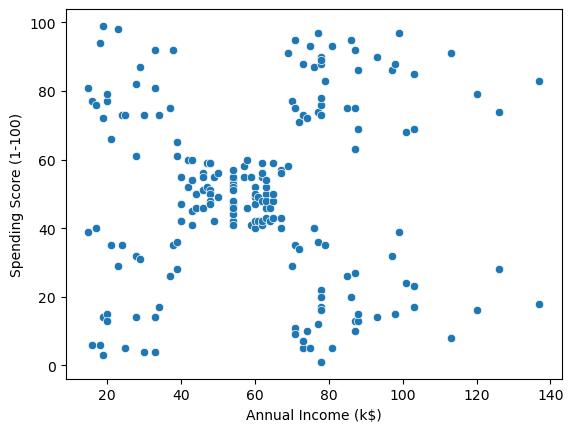

In [13]:
sns.scatterplot(data=data, x='Annual Income (k$)', y= 'Spending Score (1-100)')

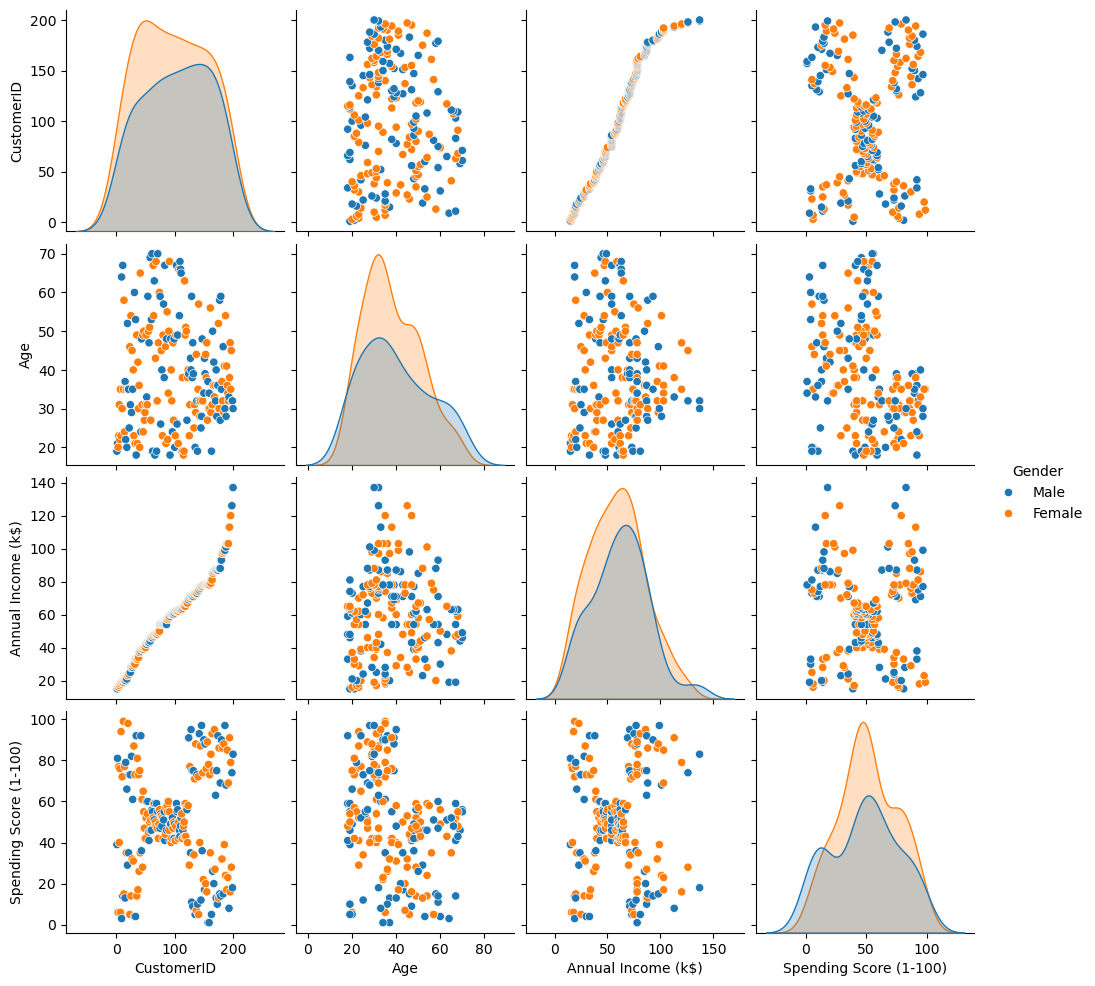

In [14]:
#data = data.drop("CustomerID", axis=1)
sns.pairplot(data, hue="Gender")

In [15]:
data.groupby(["Gender"])[['Age','Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [16]:
data.select_dtypes(include='number').corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<Axes: >

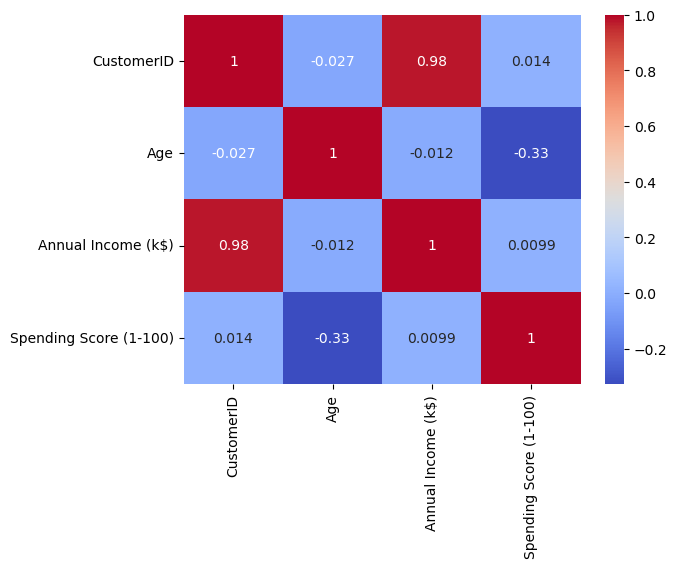

In [17]:
sns.heatmap(data.select_dtypes(include='number').corr(),annot=True,cmap='coolwarm')

#Clustering-- Univariate, Bivariate, Multivariate

In [19]:
clustering1 = KMeans(n_clusters=3)

In [20]:
clustering1.fit(data[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [21]:
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [22]:
data["Income Cluster"] = clustering1.labels_
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [23]:
data["Income Cluster"].value_counts()

Income Cluster
2    82
0    62
1    56
Name: count, dtype: int64

In [24]:
clustering1.inertia_

25720.591210520397

In [25]:
inertia_scores =[]
for i in range (1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data[["Annual Income (k$)"]])
    inertia_scores.append(kmeans.inertia_)

In [26]:
inertia_scores

[137277.28,
 49761.73701298701,
 23528.152173913044,
 13278.112713472485,
 10175.91862745098,
 5134.403624344128,
 3931.988095238096,
 3476.0281215860164,
 2710.209235209235,
 1886.90055631503]

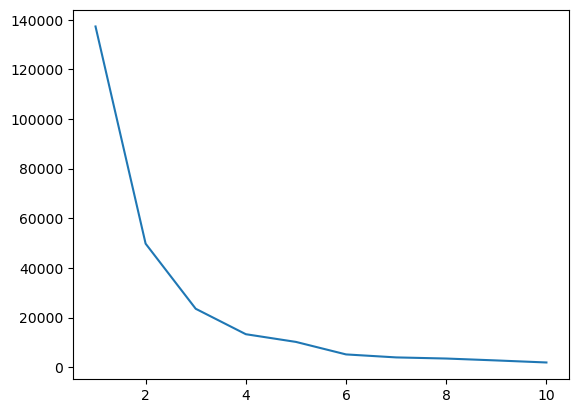

In [27]:
plt.plot(range(1,11), inertia_scores)

In [28]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster'],
      dtype='object')

In [29]:
data.groupby("Income Cluster")[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,37.451613,30.612903,49.838710
1,36.910714,92.142857,50.517857
2,41.231707,61.634146,50.256098


#Bivariate Clustering

In [84]:
clustering2 = KMeans(n_clusters = 5)
clustering2.fit(data[['Annual Income (k$)', 'Spending Score (1-100)']])
clustering2.labels_
data['Spending and Income Cluster'] = clustering2.labels_
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,1
1,2,Male,21,15,81,0,4
2,3,Female,20,16,6,0,1
3,4,Female,23,16,77,0,4
4,5,Female,31,17,40,0,1


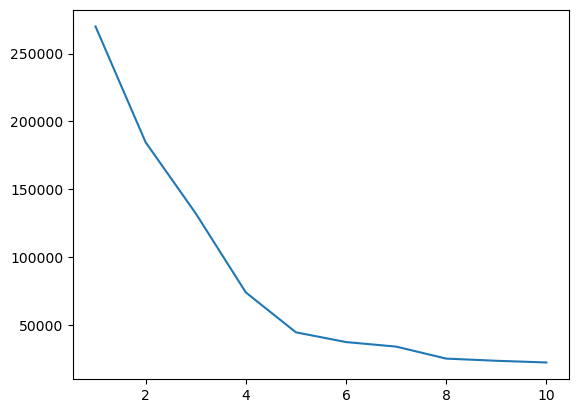

In [86]:
inertia_scores2 =[]
for i in range (1,11):
    kmeans2 = KMeans(n_clusters=i)
    kmeans2.fit(data[["Annual Income (k$)", "Spending Score (1-100)"]])
    inertia_scores2.append(kmeans2.inertia_)
    
plt.plot(range(1,11), inertia_scores2)

In [110]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x', 'y']
centers

,x,y
0,55.296296,49.518519
1,26.304348,20.913043
2,88.200000,17.114286
3,86.538462,82.128205
4,25.727273,79.363636


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

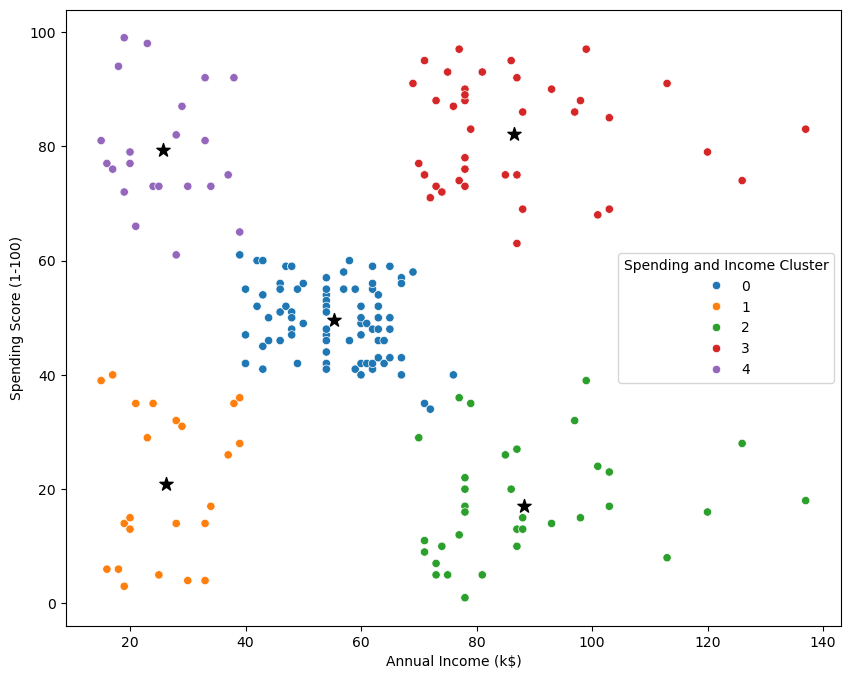

In [114]:
plt.figure(figsize = ((10,8)))
plt.scatter(x=centers['x'], y=centers['y'], s=100, c='black', marker = '*')
sns.scatterplot(data=data, x="Annual Income (k$)", y="Spending Score (1-100)", hue='Spending and Income Cluster', palette='tab10')


In [120]:
pd.crosstab(data['Spending and Income Cluster'],data['Gender'], normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.592593,0.407407
1,0.608696,0.391304
2,0.457143,0.542857
3,0.538462,0.461538
4,0.590909,0.409091


In [124]:
data.groupby("Spending and Income Cluster")[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,42.716049,55.296296,49.518519
1,45.217391,26.304348,20.913043
2,41.114286,88.200000,17.114286
3,32.692308,86.538462,82.128205
4,25.272727,25.727273,79.363636


#Multivariate Clustering

In [127]:
from sklearn.preprocessing import StandardScaler

In [129]:
scale = StandardScaler()

In [131]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,1
1,2,Male,21,15,81,0,4
2,3,Female,20,16,6,0,1
3,4,Female,23,16,77,0,4
4,5,Female,31,17,40,0,1


In [137]:
newdf = pd.get_dummies(data, drop_first=True).astype(int)
newdf.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,1,19,15,39,0,1,1
1,2,21,15,81,0,4,1
2,3,20,16,6,0,1,0
3,4,23,16,77,0,4,0
4,5,31,17,40,0,1,0


In [139]:
newdf.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster', 'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [143]:
newdf = newdf[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]
newdf.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [145]:
newdf = scale.fit_transform(newdf)

In [149]:
newdf = pd.DataFrame(scale.fit_transform(newdf))

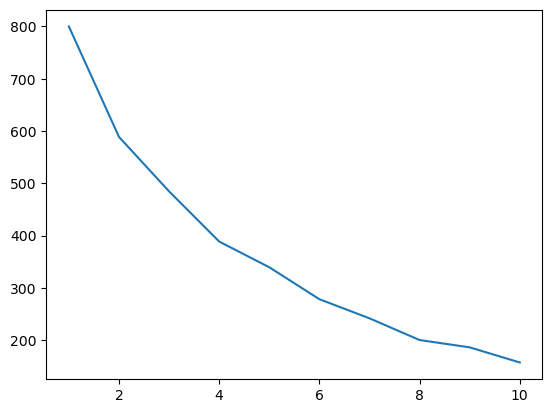

In [151]:
inertia_scores3 =[]
for i in range (1,11):
    kmeans3 = KMeans(n_clusters=i)
    kmeans3.fit(newdf)
    inertia_scores3.append(kmeans3.inertia_)

plt.plot(range(1,11), inertia_scores3)

In [153]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,1
1,2,Male,21,15,81,0,4
2,3,Female,20,16,6,0,1
3,4,Female,23,16,77,0,4
4,5,Female,31,17,40,0,1
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,3
196,197,Female,45,126,28,1,2
197,198,Male,32,126,74,1,3
198,199,Male,32,137,18,1,2


In [155]:
data.to_csv('Clustering.csv')